# Projet 5

In [1]:
#Importation de mes librairies necessaire pour mon projet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Fonction test clé primaire

In [3]:
refproduit= pd.read_excel('erp.xlsx')
cms=pd.read_excel('web.xlsx')
liaison=pd.read_excel('liaison.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
def test_cle(df, cols):
    if df.shape[0] == df[cols].nunique(dropna=False):
        print("colonne candidate")
    else:
        print("colonne non candidate")

In [5]:
def test_cle2(df, cols):
    if df.shape[0] == df.set_index(cols).index.nunique(dropna=False):
        print("colonne(s) candidate(s)")
    else:
        print("colonne(s) non candidate(s)")

In [6]:
def test_cle3(df, cols):
    if df.shape[0] == df.drop_duplicates(cols).shape[0]:
        print("colonne(s) candidate(s)")
    else:
        print("colonne(s) non candidate(s)")

In [7]:
test_cle(df=cms,cols='sku')

colonne non candidate


In [8]:
test_cle2(df=refproduit,cols= ['onsale_web','price'])

colonne(s) non candidate(s)


In [9]:
test_cle3(df=refproduit,cols= 'product_id')

colonne(s) candidate(s)


# Inialisation et lissage de mes fichiers

In [10]:
refproduit.head()
#Verifie que le dataframe est bien importé

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [11]:
refproduit.info()
#Verifie le nombre de ligne non nul + le Dtype des colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [12]:
refproduit.describe()
#Verifie un certain nombre de parametre

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [13]:
refproduit.nunique()
#Voir combien de valeur unique ce trouve dans les colonnes

product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64

In [14]:
refproduit.duplicated().value_counts()
#Pas de doublons parfait

False    825
dtype: int64

In [15]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [16]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [17]:
liaison.describe()

,product_id
count,825.000000
mean,5162.597576
std,902.644635
min,3847.000000
25%,4348.000000
50%,4907.000000
75%,5805.000000
max,7338.000000


In [18]:
liaison.duplicated().value_counts()
#pas de doublon parfait

False    825
dtype: int64

In [19]:
liaison.nunique()

product_id    825
id_web        734
dtype: int64

In [20]:
#Pas de doublon sur product_id, mais possiblement sur id_web grâce au point info 734 non_null

In [21]:
liaison[liaison['id_web'].isnull()].merge(refproduit, left_on='product_id', right_on='product_id', how='left').describe(include='all')
#Recherche de la difference entre 734 et 825 sur id_web

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
count,91.000000,0,91.000000,91.000000,91.000000,91
unique,NaN,0,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,NaN,62
mean,6136.461538,NaN,0.032967,34.018681,14.483516,NaN
std,1137.928521,NaN,0.179540,20.007204,26.189634,NaN
min,4055.000000,NaN,0.000000,8.000000,0.000000,NaN
25%,4836.000000,NaN,0.000000,21.000000,0.000000,NaN
50%,6869.000000,NaN,0.000000,31.000000,5.000000,NaN
75%,7087.500000,NaN,0.000000,44.150000,18.000000,NaN


In [22]:
liaison[liaison['id_web'].isnull()].merge(refproduit, left_on='product_id', right_on='product_id', how='left')['onsale_web'].value_counts()

0    88
1     3
Name: onsale_web, dtype: int64

In [23]:
#3 produits vendu sur le net mais pas d'id_web correspondant, mise en evidence un peu plus bas

In [24]:
cms.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [25]:
#Changement de nom de colonne en id_web pour la jointure
cms = cms.rename(columns={"sku": "id_web"})
cms.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [26]:
#Des valeurs nul dans id_web.
cms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [27]:
cms.duplicated(keep=False).value_counts()

False    1430
True       83
dtype: int64

In [28]:
cms[cms.duplicated(keep=False)].describe(include='all').T

C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_20496\2797420788.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cms[cms.duplicated(keep=False)].describe(include='all').T
C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_20496\2797420788.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cms[cms.duplicated(keep=False)].describe(include='all').T
C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_20496\2797420788.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id_web,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virtual,83.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
downloadable,83.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rating_count,83.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
average_rating,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_sales,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax_status,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax_class,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
post_author,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
post_date,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Suppression des doublons parfait
cms.drop_duplicates(keep=False,inplace=True)
cms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 1428 non-null   object        
 1   virtual                1430 non-null   int64         
 2   downloadable           1430 non-null   int64         
 3   rating_count           1430 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

# Recherche suppression des doublons/NaN


In [30]:
#Mise en evidence des deux lignes à 0 pour id_web + pivot avec le .T
cms[cms['id_web'].isnull()].describe(include='all').T

C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_20496\3898454281.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cms[cms['id_web'].isnull()].describe(include='all').T
C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_20496\3898454281.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cms[cms['id_web'].isnull()].describe(include='all').T
C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_20496\3898454281.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id_web,0,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virtual,2.0,NaN,NaN,NaN,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0
downloadable,2.0,NaN,NaN,NaN,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rating_count,2.0,NaN,NaN,NaN,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0
average_rating,2.0,NaN,NaN,NaN,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total_sales,2.0,NaN,NaN,NaN,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tax_status,2,1,taxable,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax_class,0.0,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
post_author,2.0,NaN,NaN,NaN,NaT,NaT,2.0,0.0,2.0,2.0,2.0,2.0,2.0
post_date,2,2,2018-07-31 12:07:23,1,2018-07-31 12:07:23,2018-08-08 11:23:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Mise en évidence des deux lignes de produits dans le dataFrame sans id_web. Il n'y a pas eu de vente sur ces deux produits
#Je peux donc les supprimer.
cms_null = cms[(cms['id_web'].isnull()) & (cms['post_name'].notnull())]
cms_null.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [32]:
cms.nunique()

id_web                    714
virtual                     1
downloadable                1
rating_count                1
average_rating              1
total_sales                41
tax_status                  1
tax_class                   0
post_author                 2
post_date                 716
post_date_gmt             716
post_content                0
post_title                713
post_excerpt              679
post_status                 1
comment_status              1
ping_status                 1
post_password               0
post_name                 716
post_modified             589
post_modified_gmt         589
post_content_filtered       0
post_parent                 1
guid                     1430
menu_order                  1
post_type                   2
post_mime_type              1
comment_count               1
dtype: int64

In [33]:
cms.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [34]:
#On retire toutes les valeurs NaN de la colonne id_web
cms = cms.dropna(subset=['id_web'])
cms.head(10)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,19815,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,15303,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:13:35,...,pierre-jean-villa-saint-joseph-saut-ange-2018,2019-11-02 13:25:07,2019-11-02 12:25:07,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
7,14975,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:45:14,...,pierre-gaillard-condrieu-2018,2020-08-14 18:15:02,2020-08-14 16:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
8,16042,0,0,0,0.0,7.0,taxable,NaN,2.0,2018-02-12 09:54:27,...,pierre-gaillard-cornas-2017,2020-08-14 10:15:02,2020-08-14 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9,14980,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-12 10:03:05,...,pierre-gaillard-cote-rotie-esprit-blond-2017,2020-08-24 14:00:03,2020-08-24 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [35]:
cms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 1428 non-null   object        
 1   virtual                1428 non-null   int64         
 2   downloadable           1428 non-null   int64         
 3   rating_count           1428 non-null   int64         
 4   average_rating         1428 non-null   float64       
 5   total_sales            1428 non-null   float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1428 non-null   float64       
 9   post_date              1428 non-null   datetime64[ns]
 10  post_date_gmt          1428 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1428 non-null   object        
 13  pos

In [36]:
#compter les doublons. Nous avons 714 doublons
cms['id_web'].duplicated().value_counts()

False    714
True     714
Name: id_web, dtype: int64

In [37]:
cms.describe(include='all').T

C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_20496\999980861.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cms.describe(include='all').T
C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_20496\999980861.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cms.describe(include='all').T
C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_20496\999980861.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id_web,1428,714,bon-cadeau-25-euros,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virtual,1428.0,NaN,NaN,NaN,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0
downloadable,1428.0,NaN,NaN,NaN,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rating_count,1428.0,NaN,NaN,NaN,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0
average_rating,1428.0,NaN,NaN,NaN,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total_sales,1428.0,NaN,NaN,NaN,NaT,NaT,4.012605,8.515198,0.0,0.0,1.0,4.0,96.0
tax_status,714,1,taxable,714,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax_class,0.0,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
post_author,1428.0,NaN,NaN,NaN,NaT,NaT,1.998599,0.037411,1.0,2.0,2.0,2.0,2.0
post_date,1428,714,2018-06-01 13:53:46,2,2018-02-08 12:58:52,2020-07-20 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#On garde seulement les ligne ou l'on appercoit product.Il n'y a pas que des lignes de vente dans le cms
cms=cms[cms['post_type'] == 'product']

In [78]:
#Verification pour savoir si il ne reste que product
cms['post_type'].value_counts()

product    714
Name: post_type, dtype: int64

In [40]:
cms['id_web'].duplicated().value_counts()

False    714
Name: id_web, dtype: int64

In [41]:
#Les doublons ont étaient enlever

In [42]:
#JOINTURE externe pour verifier qu'il n'y a pas d'incohérence
fusion1= pd.merge(refproduit,liaison,on='product_id',how='outer', indicator=True)
fusion1.head(10)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
5,4040,1,34.3,0,outofstock,15303,both
6,4041,1,32.7,15,instock,14975,both
7,4042,1,31.2,34,instock,16042,both
8,4043,1,60.0,12,instock,14980,both
9,4045,1,42.6,66,instock,16041,both


In [43]:
fusion1['_merge'].value_counts()

both          825
left_only       0
right_only      0
Name: _merge, dtype: int64

In [44]:
fusion1= pd.merge(refproduit,liaison,on='product_id', indicator=True)
fusion1.head(10)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
5,4040,1,34.3,0,outofstock,15303,both
6,4041,1,32.7,15,instock,14975,both
7,4042,1,31.2,34,instock,16042,both
8,4043,1,60.0,12,instock,14980,both
9,4045,1,42.6,66,instock,16041,both


In [45]:
#jointure externe entre fusion1 et cms sur la colonne id_web
web=pd.merge(fusion1,cms, on ='id_web', how='outer',indicator='_merge2')
web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2
0,3847,1,24.2,0,outofstock,15298,both,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,both,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,both,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,both,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,both,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [46]:
#Verifier les produits vendu en ligne
web['_merge2'].value_counts()

both          714
left_only     111
right_only      0
Name: _merge2, dtype: int64

In [47]:
web[web['_merge2']=='left_only'].describe(include='all').T

C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_20496\3313275724.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  web[web['_merge2']=='left_only'].describe(include='all').T
C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_20496\3313275724.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  web[web['_merge2']=='left_only'].describe(include='all').T
C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_20496\3313275724.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeri

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,111.0,NaN,NaN,NaN,5999.072072,1112.203699,4055.0,4866.5,6324.0,7082.5,7329.0
onsale_web,111.0,NaN,NaN,NaN,0.027027,0.162898,0.0,0.0,0.0,0.0,1.0
price,111.0,NaN,NaN,NaN,31.917117,19.107908,8.0,20.35,30.0,40.0,144.0
stock_quantity,111.0,NaN,NaN,NaN,12.027027,24.302809,0.0,0.0,3.0,14.0,192.0
stock_status,111,2,instock,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_web,20.0,20.0,13771.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_merge,111,1,both,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virtual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
downloadable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_count,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#91 valeur nul en id_web et 20 sont issue d'un manque de donné de la part de la societe 
#(n'ont pas d'id produit)

In [49]:
#jointure entre fusion1 et cms sur la colonne id_web
web=pd.merge(fusion1,cms, on ='id_web', how='inner',indicator='_merge2')
web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2
0,3847,1,24.2,0,outofstock,15298,both,0,0,0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,both,0,0,0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,both,0,0,0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,both,0,0,0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,both,0,0,0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [50]:
web.nunique()

product_id               714
onsale_web                 1
price                    362
stock_quantity           126
stock_status               2
id_web                   714
_merge                     1
virtual                    1
downloadable               1
rating_count               1
average_rating             1
total_sales               41
tax_status                 1
tax_class                  0
post_author                2
post_date                714
post_date_gmt            714
post_content               0
post_title               711
post_excerpt             677
post_status                1
comment_status             1
ping_status                1
post_password              0
post_name                714
post_modified            587
post_modified_gmt        587
post_content_filtered      0
post_parent                1
guid                     714
menu_order                 1
post_type                  1
post_mime_type             0
comment_count              1
_merge2       

In [51]:
web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2
0,3847,1,24.2,0,outofstock,15298,both,0,0,0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,both,0,0,0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,both,0,0,0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,both,0,0,0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,both,0,0,0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [52]:
web['chiffreAffaire/Bouteille']=web['price']*web['total_sales']
web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge,virtual,downloadable,rating_count,...,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2,chiffreAffaire/Bouteille
0,3847,1,24.2,0,outofstock,15298,both,0,0,0,...,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,145.2
1,3849,1,34.3,0,outofstock,15296,both,0,0,0,...,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
2,3850,1,20.8,0,outofstock,15300,both,0,0,0,...,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
3,4032,1,14.1,0,outofstock,19814,both,0,0,0,...,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,42.3
4,4039,1,46.0,0,outofstock,19815,both,0,0,0,...,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0


In [53]:
#Création liste
caList=['product_id','id_web','price','stock_quantity','total_sales','chiffreAffaire/Bouteille','post_title']
ca=web[caList]
#ordre decroissant
ca.sort_values(by='chiffreAffaire/Bouteille' ,ascending=False, inplace=True)
ca.head(10)

C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_20496\815490590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca.sort_values(by='chiffreAffaire/Bouteille' ,ascending=False, inplace=True)


,product_id,id_web,price,stock_quantity,total_sales,chiffreAffaire/Bouteille,post_title
194,4334,7818,49.0,0,96.0,4704.0,Champagne Gosset Grand Blanc de Blancs
71,4144,1662,49.0,11,87.0,4263.0,Champagne Gosset Grand Rosé
218,4402,3510,176.0,8,13.0,2288.0,Cognac Frapin VIP XO
70,4142,11641,53.0,8,30.0,1590.0,Champagne Gosset Grand Millésime 2006
69,4141,304,39.0,1,40.0,1560.0,Champagne Gosset Grande Réserve
201,4355,12589,126.5,2,11.0,1391.5,Champagne Egly-Ouriet Grand Cru Blanc de Noirs
199,4352,15940,225.0,0,5.0,1125.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008
79,4153,16237,29.0,0,36.0,1044.0,Elian Daros Côtes du Marmandais Clos Baquey 2015
651,6206,16580,25.2,120,41.0,1033.2,Domaine Giudicelli Patrimonio Blanc 2019
30,4068,16416,16.6,157,62.0,1029.2,Gilles Robin Crozes-Hermitage Rouge Papillon 2019


In [54]:
totaux=web['chiffreAffaire/Bouteille'].sum()
print('Nous avons réaliser',totaux,'€ de chiffre d"affaire réalisé en ligne')

Nous avons réaliser 70568.6 € de chiffre d"affaire réalisé en ligne


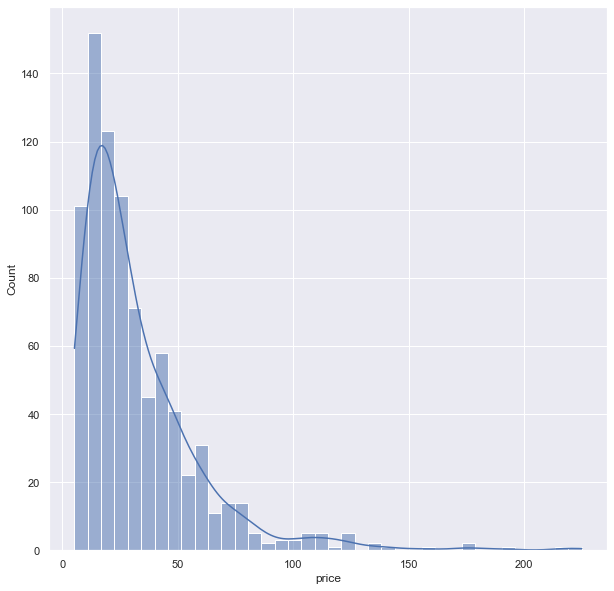

In [55]:
sns.set(style="darkgrid")
df = sns.load_dataset("iris")
#changement de la taille du histoplot
fig, ax = plt.subplots(figsize=(10, 10))

sns.histplot(data=refproduit, x="price", kde=True)
plt.show()


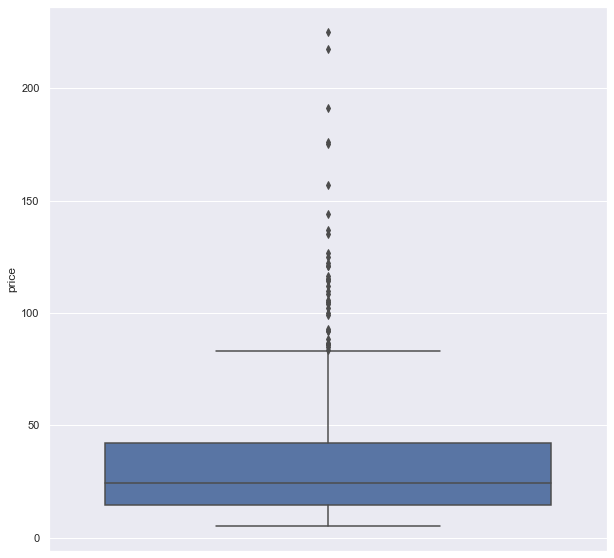

In [56]:
#BackGround gris
sns.set(style="darkgrid")

boxplot = sns.load_dataset('iris')
boxplot.head()

#changement de la taille du boxplot
fig, ax = plt.subplots(figsize=(10, 10))


sns.boxplot( y = refproduit["price"] );
plt.show()

# Test du log pour continuité sur une loi normal

In [57]:
log=np.log(refproduit['price'])

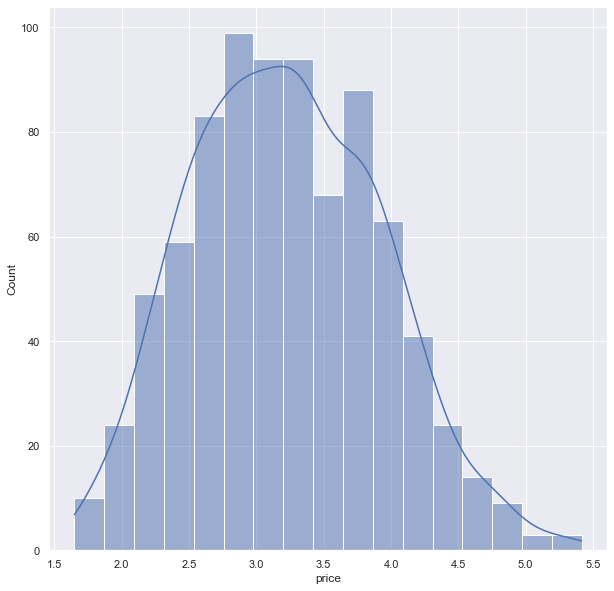

In [58]:
sns.set(style="darkgrid")
df = sns.load_dataset("iris")
#changement de la taille du histoplot
fig, ax = plt.subplots(figsize=(10, 10))

sns.histplot(data=refproduit, x=log, kde=True)
plt.show()

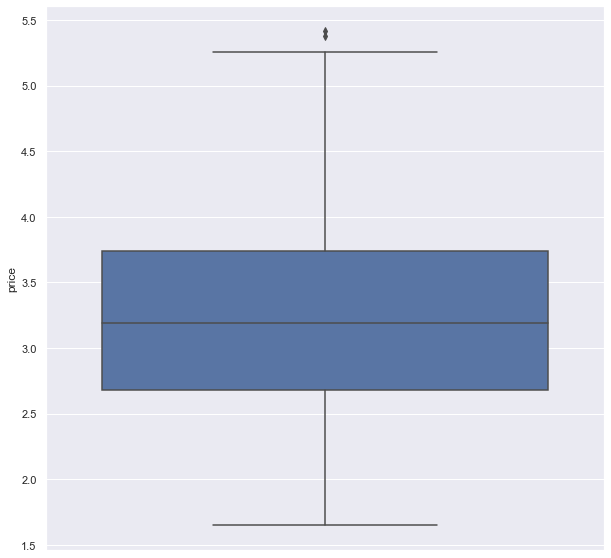

In [59]:
#BackGround gris
sns.set(style="darkgrid")

boxplot = sns.load_dataset('iris')
boxplot.head()

#changement de la taille du boxplot
fig, ax = plt.subplots(figsize=(10, 10))


sns.boxplot( y = log );
plt.show()

In [60]:
#On peut en deduire que il n'y a que deux valeurs à definir comme outliner

# Continuon nos recherches avec nos BestSeller

In [61]:
#Nos plus grosse ventes en terme de bouteille vendu
Bestlist=['product_id','id_web','price','stock_quantity','total_sales','post_title']
Bestseller=web[Bestlist]
Bestseller.sort_values(by ='total_sales',ascending= False, inplace=True)
Bestseller.head(10)

C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_20496\2366505114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bestseller.sort_values(by ='total_sales',ascending= False, inplace=True)


,product_id,id_web,price,stock_quantity,total_sales,post_title
194,4334,7818,49.0,0,96.0,Champagne Gosset Grand Blanc de Blancs
71,4144,1662,49.0,11,87.0,Champagne Gosset Grand Rosé
30,4068,16416,16.6,157,62.0,Gilles Robin Crozes-Hermitage Rouge Papillon 2019
119,4200,16295,5.8,190,46.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...
97,4172,16210,5.7,167,43.0,Maurel Pays d'Oc Chardonnay 2019
109,4187,16189,13.3,90,42.0,Le Pas de l'Escalette Languedoc Les Petits Pas...
651,6206,16580,25.2,120,41.0,Domaine Giudicelli Patrimonio Blanc 2019
69,4141,304,39.0,1,40.0,Champagne Gosset Grande Réserve
625,6047,16264,10.9,46,38.0,Château de La Liquière Faugères L'Ampoule 2019
324,4729,38,8.6,151,38.0,Emile Boeckel Crémant Brut Blanc de Blancs


In [62]:
ventetotal = web['total_sales'].sum()
print ("nous avons vendu",round(ventetotal),"bouteilles cette année en ligne")

nous avons vendu 2865 bouteilles cette année en ligne


In [63]:
#Creation d'un nouveau dataframe pour conserver simplement les colonnes 
#qui nous interesse pour gagner en lisibilité

In [64]:
weblist = ['product_id','id_web','price','stock_quantity','total_sales','chiffreAffaire/Bouteille','post_title']
webmod= web[weblist]
webmod.head(10)

,product_id,id_web,price,stock_quantity,total_sales,chiffreAffaire/Bouteille,post_title
0,3847,15298,24.2,0,6.0,145.2,Pierre Jean Villa Saint-Joseph Préface 2018
1,3849,15296,34.3,0,0.0,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017
2,3850,15300,20.8,0,0.0,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...
3,4032,19814,14.1,0,3.0,42.3,Pierre Jean Villa IGP Collines Rhodaniennes Ga...
4,4039,19815,46.0,0,0.0,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017
5,4040,15303,34.3,0,0.0,0.0,Pierre Jean Villa Saint-Joseph Saut De l'Ange ...
6,4041,14975,32.7,15,0.0,0.0,Pierre Gaillard Condrieu 2018
7,4042,16042,31.2,34,7.0,218.4,Pierre Gaillard Cornas 2017
8,4043,14980,60.0,12,3.0,180.0,Pierre Gaillard Côte Rôtie Esprit de Blonde 2017
9,4045,16041,42.6,66,14.0,596.4,Pierre Gaillard Côte Rôtie 2018


In [65]:
#Representation en  % du nombre de vente par bouteille sur notre vente total
webmod['% vente']= (webmod['total_sales']/webmod['total_sales'].sum())*100
webmod.head(10)

C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_20496\976062218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  webmod['% vente']= (webmod['total_sales']/webmod['total_sales'].sum())*100


,product_id,id_web,price,stock_quantity,total_sales,chiffreAffaire/Bouteille,post_title,% vente
0,3847,15298,24.2,0,6.0,145.2,Pierre Jean Villa Saint-Joseph Préface 2018,0.209424
1,3849,15296,34.3,0,0.0,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0.000000
2,3850,15300,20.8,0,0.0,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,0.000000
3,4032,19814,14.1,0,3.0,42.3,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,0.104712
4,4039,19815,46.0,0,0.0,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,0.000000
5,4040,15303,34.3,0,0.0,0.0,Pierre Jean Villa Saint-Joseph Saut De l'Ange ...,0.000000
6,4041,14975,32.7,15,0.0,0.0,Pierre Gaillard Condrieu 2018,0.000000
7,4042,16042,31.2,34,7.0,218.4,Pierre Gaillard Cornas 2017,0.244328
8,4043,14980,60.0,12,3.0,180.0,Pierre Gaillard Côte Rôtie Esprit de Blonde 2017,0.104712
9,4045,16041,42.6,66,14.0,596.4,Pierre Gaillard Côte Rôtie 2018,0.488656


In [66]:
webmod=webmod.sort_values(by = '% vente',ascending= False)
webmod.head(10)

,product_id,id_web,price,stock_quantity,total_sales,chiffreAffaire/Bouteille,post_title,% vente
194,4334,7818,49.0,0,96.0,4704.0,Champagne Gosset Grand Blanc de Blancs,3.350785
71,4144,1662,49.0,11,87.0,4263.0,Champagne Gosset Grand Rosé,3.036649
30,4068,16416,16.6,157,62.0,1029.2,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,2.164049
119,4200,16295,5.8,190,46.0,266.8,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,1.605585
97,4172,16210,5.7,167,43.0,245.1,Maurel Pays d'Oc Chardonnay 2019,1.500873
109,4187,16189,13.3,90,42.0,558.6,Le Pas de l'Escalette Languedoc Les Petits Pas...,1.465969
651,6206,16580,25.2,120,41.0,1033.2,Domaine Giudicelli Patrimonio Blanc 2019,1.431065
69,4141,304,39.0,1,40.0,1560.0,Champagne Gosset Grande Réserve,1.396161
625,6047,16264,10.9,46,38.0,414.2,Château de La Liquière Faugères L'Ampoule 2019,1.326353
324,4729,38,8.6,151,38.0,326.8,Emile Boeckel Crémant Brut Blanc de Blancs,1.326353


In [67]:
webmod=webmod.sort_values(by = '% vente')
webmod.head(10)

,product_id,id_web,price,stock_quantity,total_sales,chiffreAffaire/Bouteille,post_title,% vente
713,7338,16230,16.3,45,0.0,0.0,Domaine Saint-Nicolas Vin de France Blanc Les ...,0.0
603,5917,14775,122.0,4,0.0,0.0,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,0.0
602,5916,14774,93.0,3,0.0,0.0,Wemyss Malts Single Cask Scotch Whisky Chocola...,0.0
600,5913,10014,36.0,9,0.0,0.0,Darnley's London Dry Gin Original,0.0
599,5912,15227,57.0,8,0.0,0.0,Kingsbarns Distillery Lowland Single Malt Whisky,0.0
685,6618,15539,13.5,2,0.0,0.0,Clos du Mont-Olivet Vins de Pays du Gard Confl...,0.0
598,5907,12882,17.7,5,0.0,0.0,Domaine de Montbourgeau Vin de Paille 2013,0.0
597,5906,15857,19.8,0,0.0,0.0,Domaine de Montbourgeau L'Etoile En Banode 2016,0.0
604,5918,14773,114.0,8,0.0,0.0,Wemyss Malts Single Cask Scotch Whisky Chai Ca...,0.0
686,6620,16046,51.0,2,0.0,0.0,Domaine de La Tour Du Bon Bandol Rouge Saint F...,0.0


In [68]:
webmod=webmod.sort_values(by = 'price',ascending= False,)
webmod.head(10)

,product_id,id_web,price,stock_quantity,total_sales,chiffreAffaire/Bouteille,post_title,% vente
199,4352,15940,225.0,0,5.0,1125.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,0.174520
426,5001,14581,217.5,20,0.0,0.0,David Duband Charmes-Chambertin Grand Cru 2014,0.000000
587,5892,14983,191.3,10,3.0,573.9,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,0.104712
218,4402,3510,176.0,8,13.0,2288.0,Cognac Frapin VIP XO,0.453752
553,5767,15185,175.0,12,0.0,0.0,Camille Giroud Clos de Vougeot 2016,0.000000
221,4406,7819,157.0,3,0.0,0.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...,0.000000
381,4904,14220,137.0,13,5.0,685.0,Domaine Des Croix Corton Charlemagne Grand Cru...,0.174520
642,6126,14923,135.0,10,2.0,270.0,Champagne Gosset Célébris Vintage 2007,0.069808
201,4355,12589,126.5,2,11.0,1391.5,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,0.383944
511,5612,14915,124.8,12,0.0,0.0,Domaine Weinbach Gewurztraminer Grand Cru Furs...,0.000000


In [69]:
webmod=webmod.sort_values(by = 'price')
webmod.head(10)

,product_id,id_web,price,stock_quantity,total_sales,chiffreAffaire/Bouteille,post_title,% vente
645,6129,14570,5.2,30,0.0,0.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,0.000000
99,4174,16209,5.7,94,6.0,34.2,Maurel Cabardès Tradition 2017,0.209424
98,4173,16211,5.7,100,13.0,74.1,Maurel Pays d'Oc Chenin-Colombard 2019,0.453752
97,4172,16210,5.7,167,43.0,245.1,Maurel Pays d'Oc Chardonnay 2019,1.500873
560,5777,14338,5.7,132,0.0,0.0,Maurel Pays d'Oc Cabernet-Sauvignon 2017,0.000000
118,4198,16322,5.8,105,0.0,0.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,0.000000
561,5778,15561,5.8,36,24.0,139.2,Maurel Pays d'Oc Merlot 2018,0.837696
119,4200,16295,5.8,190,46.0,266.8,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,1.605585
562,5779,16213,5.8,211,8.0,46.4,Maurel Pays d'Oc Syrah 2019,0.279232
292,4680,15934,6.3,34,2.0,12.6,Domaine de Joy Côtes de Gascogne Envie de Joy ...,0.069808


In [70]:
#Verification
webmod['% vente'].sum()

100.0

In [71]:
#Rapelle du chiffre d'affaire total
print('Nous avons',totaux,'€ de chiffre d"affaire')

Nous avons 70568.6 € de chiffre d"affaire


In [72]:
webmod['% chiffreAffaire/bouteille']= (webmod['chiffreAffaire/Bouteille']/webmod['chiffreAffaire/Bouteille'].sum())*100
webmod.head(10)

,product_id,id_web,price,stock_quantity,total_sales,chiffreAffaire/Bouteille,post_title,% vente,% chiffreAffaire/bouteille
645,6129,14570,5.2,30,0.0,0.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,0.000000,0.000000
99,4174,16209,5.7,94,6.0,34.2,Maurel Cabardès Tradition 2017,0.209424,0.048463
98,4173,16211,5.7,100,13.0,74.1,Maurel Pays d'Oc Chenin-Colombard 2019,0.453752,0.105004
97,4172,16210,5.7,167,43.0,245.1,Maurel Pays d'Oc Chardonnay 2019,1.500873,0.347322
560,5777,14338,5.7,132,0.0,0.0,Maurel Pays d'Oc Cabernet-Sauvignon 2017,0.000000,0.000000
118,4198,16322,5.8,105,0.0,0.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,0.000000,0.000000
561,5778,15561,5.8,36,24.0,139.2,Maurel Pays d'Oc Merlot 2018,0.837696,0.197255
119,4200,16295,5.8,190,46.0,266.8,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,1.605585,0.378072
562,5779,16213,5.8,211,8.0,46.4,Maurel Pays d'Oc Syrah 2019,0.279232,0.065752
292,4680,15934,6.3,34,2.0,12.6,Domaine de Joy Côtes de Gascogne Envie de Joy ...,0.069808,0.017855


In [73]:
#classement des bouteilles qui nous rapportent le plus
webmod=webmod.sort_values(by = '% chiffreAffaire/bouteille',ascending= False)
webmod.head(10)

,product_id,id_web,price,stock_quantity,total_sales,chiffreAffaire/Bouteille,post_title,% vente,% chiffreAffaire/bouteille
194,4334,7818,49.0,0,96.0,4704.0,Champagne Gosset Grand Blanc de Blancs,3.350785,6.665854
71,4144,1662,49.0,11,87.0,4263.0,Champagne Gosset Grand Rosé,3.036649,6.040930
218,4402,3510,176.0,8,13.0,2288.0,Cognac Frapin VIP XO,0.453752,3.242235
70,4142,11641,53.0,8,30.0,1590.0,Champagne Gosset Grand Millésime 2006,1.047120,2.253127
69,4141,304,39.0,1,40.0,1560.0,Champagne Gosset Grande Réserve,1.396161,2.210615
201,4355,12589,126.5,2,11.0,1391.5,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,0.383944,1.971840
199,4352,15940,225.0,0,5.0,1125.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,0.174520,1.594193
79,4153,16237,29.0,0,36.0,1044.0,Elian Daros Côtes du Marmandais Clos Baquey 2015,1.256545,1.479412
651,6206,16580,25.2,120,41.0,1033.2,Domaine Giudicelli Patrimonio Blanc 2019,1.431065,1.464107
30,4068,16416,16.6,157,62.0,1029.2,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,2.164049,1.458439


In [74]:
#Verification
webmod['% chiffreAffaire/bouteille'].sum()

100.0